In [1]:
import pandas as pd

# Load each CSV file, addressing the dtype warning by setting low_memory=False
books_df = pd.read_csv(r"C:\Users\Sosa the chief\Desktop\python\portfolio\book recommender\Books.csv", low_memory=False)
ratings_df = pd.read_csv(r"C:\Users\Sosa the chief\Desktop\python\portfolio\book recommender\Ratings.csv")
users_df = pd.read_csv(r"C:\Users\Sosa the chief\Desktop\python\portfolio\book recommender\Users.csv")

# Previewing the data
print("Books DataFrame:")
print(books_df.head())
print("\nRatings DataFrame:")
print(ratings_df.head())
print("\nUsers DataFrame:")
print(users_df.head())

# Merging datasets using actual column names
# Merge Ratings with Books on 'ISBN'
merged_df = pd.merge(ratings_df, books_df, on='ISBN', how='inner')

# Merge the result with Users on 'User-ID'
complete_df = pd.merge(merged_df, users_df, on='User-ID', how='inner')

# Display the merged dataset
print("\nComplete DataFrame:")
print(complete_df.head())

# Save the complete dataset if needed
complete_df.to_csv(r"C:\Users\Sosa the chief\Desktop\python\portfolio\book recommender\CompleteDataset.csv", index=False)


Books DataFrame:
         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://i

In [2]:
# Total values in each DataFrame
books_total_values = books_df.size
ratings_total_values = ratings_df.size
users_total_values = users_df.size

# Missing values in each DataFrame
books_missing_values = books_df.isnull().sum().sum()
ratings_missing_values = ratings_df.isnull().sum().sum()
users_missing_values = users_df.isnull().sum().sum()

# Display results
print("Books DataFrame:")
print(f"Total values: {books_total_values}")
print(f"Missing values: {books_missing_values}")

print("\nRatings DataFrame:")
print(f"Total values: {ratings_total_values}")
print(f"Missing values: {ratings_missing_values}")

print("\nUsers DataFrame:")
print(f"Total values: {users_total_values}")
print(f"Missing values: {users_missing_values}")

Books DataFrame:
Total values: 2170880
Missing values: 7

Ratings DataFrame:
Total values: 3449340
Missing values: 0

Users DataFrame:
Total values: 836574
Missing values: 110762


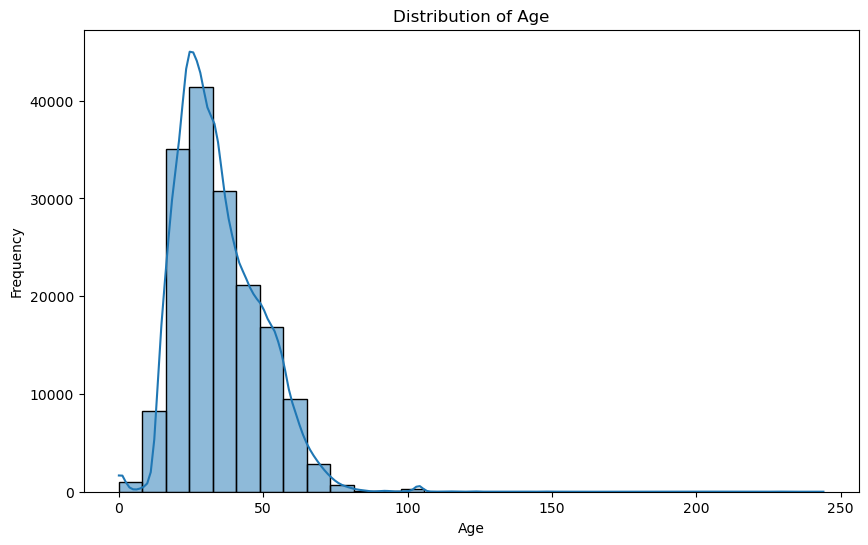

Correlation between Age and Book-Rating:
                  Age  Book-Rating
Age          1.000000    -0.025252
Book-Rating -0.025252     1.000000


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
books_df = pd.read_csv(r"C:\Users\Sosa the chief\Desktop\python\portfolio\book recommender\Books.csv", low_memory=False)
ratings_df = pd.read_csv(r"C:\Users\Sosa the chief\Desktop\python\portfolio\book recommender\Ratings.csv")
users_df = pd.read_csv(r"C:\Users\Sosa the chief\Desktop\python\portfolio\book recommender\Users.csv")

# Merge datasets for complete view
merged_df = pd.merge(ratings_df, users_df, on='User-ID', how='inner')

# Step 1: Plot Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(users_df['Age'].dropna(), bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Step 2: Check Correlation between Age and Book-Rating
# Merging complete dataset with Books for analysis
full_df = pd.merge(merged_df, books_df, on='ISBN', how='inner')
correlation = full_df[['Age', 'Book-Rating']].corr()
print("Correlation between Age and Book-Rating:")
print(correlation)

In [4]:
# Check columns in users_df to confirm the presence of 'Age'
print("Columns in Users DataFrame:", users_df.columns)

# If 'Age' column is present, drop it
if 'Age' in users_df.columns:
    users_df = users_df.drop(columns=['Age'])

# Merge ratings with users on 'User-ID'
ratings_users_df = pd.merge(ratings_df, users_df, on='User-ID', how='inner')

# Merge the result with books on 'ISBN'
complete_df = pd.merge(ratings_users_df, books_df, on='ISBN', how='inner')

# Display the head of the complete merged dataset
print("Complete DataFrame after merging:")
print(complete_df.head())

Columns in Users DataFrame: Index(['User-ID', 'Location', 'Age'], dtype='object')
Complete DataFrame after merging:
   User-ID        ISBN  Book-Rating                       Location  \
0   276725  034545104X            0              tyler, texas, usa   
1   276726  0155061224            5       seattle, washington, usa   
2   276727  0446520802            0  h, new south wales, australia   
3   276729  052165615X            3           rijeka, n/a, croatia   
4   276729  0521795028            6           rijeka, n/a, croatia   

                                          Book-Title      Book-Author  \
0                               Flesh Tones: A Novel       M. J. Rose   
1                                   Rites of Passage       Judith Rae   
2                                       The Notebook  Nicholas Sparks   
3                                     Help!: Level 1    Philip Prowse   
4  The Amsterdam Connection : Level 4 (Cambridge ...      Sue Leather   

  Year-Of-Publication   

In [5]:
# Check for missing values in the complete merged dataset
missing_values = complete_df.isnull().sum()
print("Missing values per column in the merged dataset:")
print(missing_values)

# Optionally, display only columns with missing values
missing_values = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(missing_values)


Missing values per column in the merged dataset:
User-ID                0
ISBN                   0
Book-Rating            0
Location               0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
dtype: int64

Columns with missing values:
Book-Author    2
Publisher      2
Image-URL-L    4
dtype: int64


In [6]:
# Drop rows with any missing values in the dataset
complete_df.dropna(inplace=True)

# Check for remaining missing values after cleaning
missing_values_after_cleaning = complete_df.isnull().sum()

# Report the number of NaNs left in the cleaned dataset
print("Missing values per column after cleaning:")
print(missing_values_after_cleaning)
print("\nTotal number of missing values after cleaning:", missing_values_after_cleaning.sum())


Missing values per column after cleaning:
User-ID                0
ISBN                   0
Book-Rating            0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

Total number of missing values after cleaning: 0


In [9]:
import pandas as pd

# Set thresholds for filtering
min_ratings_per_book = 10  # Keep books with at least 10 ratings
min_ratings_per_user = 5   # Keep users with at least 5 ratings

# Filter books based on the minimum number of ratings
popular_books = complete_df['Book-Title'].value_counts()
popular_books = popular_books[popular_books >= min_ratings_per_book].index
filtered_df = complete_df[complete_df['Book-Title'].isin(popular_books)]

# Filter users based on the minimum number of ratings
active_users = filtered_df['User-ID'].value_counts()
active_users = active_users[active_users >= min_ratings_per_user].index
filtered_df = filtered_df[filtered_df['User-ID'].isin(active_users)]

# Create the User-Book matrix
user_book_matrix = filtered_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
user_book_matrix.fillna(0, inplace=True)

# Display the shape of the reduced matrix
print("Shape of the reduced User-Book Matrix:", user_book_matrix.shape)
print("Sample of the reduced User-Book Matrix:")
print(user_book_matrix.head())


Shape of the reduced User-Book Matrix: (14322, 17446)
Sample of the reduced User-Book Matrix:
Book-Title   Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth  \
User-ID                                                                                                        
8                                                         0.0                                                  
17                                                        0.0                                                  
99                                                        0.0                                                  
114                                                       0.0                                                  
165                                                       0.0                                                  

Book-Title   Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750  \
User-ID           

In [11]:
# Normalize ratings by subtracting each user's mean rating
user_book_matrix = user_book_matrix.apply(lambda x: x - x.mean(), axis=1)


In [13]:
# Calculate the mean of each user's ratings in the normalized matrix
user_means = user_book_matrix.mean(axis=1)

# Display the mean ratings per user to verify
print("Mean ratings per user after normalization (should be close to 0):")
print(user_means.head())

# Check the overall mean across all users
overall_mean = user_means.mean()
print("\nOverall mean of user ratings after normalization:", overall_mean)


Mean ratings per user after normalization (should be close to 0):
User-ID
8     -1.018203e-19
17    -1.909131e-19
99     5.091015e-20
114    1.527304e-18
165    1.527304e-19
dtype: float64

Overall mean of user ratings after normalization: -4.3962077629351226e-20


In [19]:
# Display a sample of available book titles in the dataset
sample_books = user_book_matrix.columns[:10]  # Adjust the number as needed
print("Sample book titles available in the dataset:")
print(sample_books.tolist())


Sample book titles available in the dataset:
[' Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth', ' Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750', ' Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback))', ' Q-Space (Star Trek The Next Generation, Book 47)', ' Q-Zone (Star Trek The Next Generation, Book 48)', '!Yo!', "'Salem's Lot", '...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR', '01-01-00: A Novel of the Millennium', '01-01-00: The Novel of the Millennium']


In [24]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Transpose the matrix and convert it to sparse format
book_user_matrix = csr_matrix(user_book_matrix.T.values)  # Transpose to match books as rows

# Train the KNN model on the transposed matrix (books as rows)
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(book_user_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [26]:
def recommend_books(book_title, data, model, n_recommendations=5):
    # Ensure the book title exists in the dataset
    if book_title not in data.columns:
        available_books = data.columns[:10]  # Show first 10 books as examples
        return (f"Book '{book_title}' not found in the dataset. "
                f"Here are some available titles to try: {available_books.tolist()}")

    # Get the index of the book in the transposed matrix
    book_index = data.columns.get_loc(book_title)
    
    # Query the KNN model for similar books
    distances, indices = model.kneighbors(data.T.iloc[book_index].values.reshape(1, -1), n_neighbors=n_recommendations + 1)
    
    # Get the recommended book titles, excluding the input book itself
    recommended_books = [data.columns[i] for i in indices.flatten() if i != book_index]
    
    return recommended_books[:n_recommendations]


In [27]:
# Example usage with an existing title from the dataset
recommended_books = recommend_books("'Salem's Lot", user_book_matrix, model_knn, n_recommendations=5)
print("Books similar to 'Salem's Lot':")
print(recommended_books)


Books similar to 'Salem's Lot':
['Edge of Tommorrow', "Dead Man's Dance", "The Nitpicker's Guide for Next Generation Trekkers, Vol. 2", 'Ghost-Walker (Star Trek, Book 53)', 'Interview With the Vampire']
